# Hyperparameter Optimization | max_depth
***
### My dependancies

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
# Reading in the data in from the CSV in the data folder using pandas
breast_cancer_data = pd.read_csv("../data/clean_breast_cancer_data_after_dropped_features.csv")
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# Random depths  
Let's create an array of depths ranging from 1-10 to check our model against. We'll record the training and testing accuracy calculated at each depth and also plot the corresponding data to understand the max_depth value that results in the highest test accuracy while trying to minimize overfitting.

Since there are a maximum of 10 features, the max depth of the tree can be 10.

In [4]:
test_depths = range(1,10)
test_depths

range(1, 10)

We also need to split our data into a test and training set. We will do this using sckit learn's train_test_split method. By default, the data set is shuffled and then split with the train_test_split method

In [6]:
# Let's separate the features from the target
features_X = breast_cancer_data.drop(columns = ['id','diagnosis'])
target_y = breast_cancer_data[['diagnosis']]

In [33]:
# Let's create our train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_X, target_y, test_size=0.2, random_state = 20)

Now, the idea is to repeat the training and testing of the same training and testing data set for different values of the hyperparameter of **max_depth**. We'll do this by writing a loop that iterates over all the **test_depths**

In [34]:
training_scores = []
test_scores = []
breast_cancer_malignancy_classifier = DecisionTreeClassifier
for depth in test_depths:
    breast_cancer_malignancy_classifier = DecisionTreeClassifier(max_depth = depth)
    breast_cancer_malignancy_classifier.fit(X_train, y_train)
    breast_cancer_malignancy_classifier.predict(X_train)
    training_scores.append(breast_cancer_malignancy_classifier.score(X_train, y_train))
    breast_cancer_malignancy_classifier.predict(X_test)
    test_scores.append(breast_cancer_malignancy_classifier.score(X_test, y_test))


print(training_scores)

[0.9186813186813186, 0.9296703296703297, 0.9560439560439561, 0.9736263736263736, 0.9912087912087912, 0.9934065934065934, 0.9978021978021978, 0.9978021978021978, 1.0]


In [35]:
print(test_scores)

[0.8859649122807017, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088]


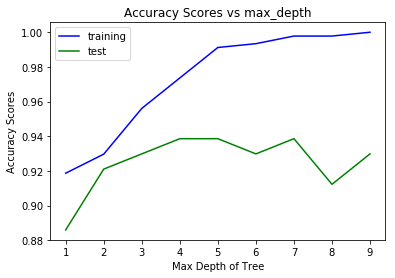

In [36]:
# Let's plot the values to see what's happening visually as well
plt.plot(test_depths,training_scores, color = 'blue')
plt.plot(test_depths,test_scores, color = 'green')
plt.title("Accuracy Scores vs max_depth")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Accuracy Scores")
plt.legend(labels = ['training','test'])

In [37]:
accuracy_data = pd.DataFrame(columns=['depth', 'training_score', 'test_score'])

In [38]:
accuracy_data['depth'] = test_depths
accuracy_data['training_score'] = training_scores
accuracy_data['test_score'] = test_scores
accuracy_data

,depth,training_score,test_score
0,1,0.918681,0.885965
1,2,0.929670,0.921053
2,3,0.956044,0.929825
3,4,0.973626,0.938596
4,5,0.991209,0.938596
5,6,0.993407,0.929825
6,7,0.997802,0.938596
7,8,0.997802,0.912281
8,9,1.000000,0.929825


In [39]:
max_test_score = max(test_scores)
max_test_score

0.9385964912280702

After repeating the above experiment multiple times, it appears that the highest test accuracy we've been able to achieve is 93.85% while at a max depth of 5.  


From the plot above, it is also clear that the behavior of the decision tree is rather eratic, and may be we can try to adjust the min_sample_split for depth 5 to see if we can improve the test accuracy while also creating a more stable model.  

## Optimum Hyperparameter | max_depth = 5
***

# Hyperparameter Optimization | min_sample_split
Let's generate an array of random split sizes

In [48]:
random_min_sample_splits = np.random.randint(low=2, high=60, size=30)
random_min_sample_splits.sort()
random_min_sample_splits

array([ 2,  3,  6,  9, 10, 12, 15, 17, 20, 26, 27, 28, 29, 30, 31, 32, 32,
       32, 34, 34, 38, 41, 43, 43, 52, 53, 55, 56, 57, 57])

In [49]:
training_scores2 = []
test_scores2 = []
breast_cancer_malignancy_classifier = DecisionTreeClassifier
for val in random_min_sample_splits:
    breast_cancer_malignancy_classifier = DecisionTreeClassifier(max_depth = 5, min_samples_split = val)
    breast_cancer_malignancy_classifier.fit(X_train, y_train)
    breast_cancer_malignancy_classifier.predict(X_train)
    training_scores2.append(breast_cancer_malignancy_classifier.score(X_train, y_train))
    breast_cancer_malignancy_classifier.predict(X_test)
    test_scores2.append(breast_cancer_malignancy_classifier.score(X_test, y_test))


print(training_scores2)

[0.9912087912087912, 0.9912087912087912, 0.9868131868131869, 0.9824175824175824, 0.978021978021978, 0.967032967032967, 0.967032967032967, 0.9560439560439561, 0.9560439560439561, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.9406593406593406, 0.9406593406593406, 0.9406593406593406, 0.9406593406593406, 0.9406593406593406, 0.9406593406593406, 0.9406593406593406, 0.9406593406593406, 0.9406593406593406, 0.9406593406593406, 0.9362637362637363, 0.9362637362637363, 0.9362637362637363, 0.9362637362637363, 0.9362637362637363, 0.9362637362637363]


In [50]:
print(test_scores2)

[0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]


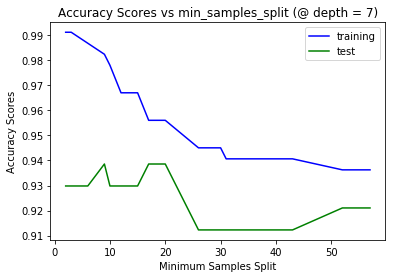

In [51]:
# Let's plot the values to see what's happening visually as well
plt.plot(random_min_sample_splits,training_scores2, color = 'blue')
plt.plot(random_min_sample_splits,test_scores2, color = 'green')
plt.title("Accuracy Scores vs min_samples_split (@ depth = 7)")
plt.xlabel("Minimum Samples Split")
plt.ylabel("Accuracy Scores")
plt.legend(labels = ['training','test'])

In [52]:
accuracy_data2 = pd.DataFrame(columns = ['splits', 'training_score', 'test_score'])
accuracy_data2['splits'] = random_min_sample_splits
accuracy_data2['training_score'] = training_scores2
accuracy_data2['test_score'] = test_scores2
accuracy_data2

,splits,training_score,test_score
0,2,0.991209,0.929825
1,3,0.991209,0.929825
2,6,0.986813,0.929825
3,9,0.982418,0.938596
4,10,0.978022,0.929825
5,12,0.967033,0.929825
6,15,0.967033,0.929825
7,17,0.956044,0.938596
8,20,0.956044,0.938596
9,26,0.945055,0.912281


In [53]:
max_test_score2 = max(test_scores2)
max_test_score2

0.9385964912280702

Considering that the min_sample_split doesn't restrict the maximum number of sample splits, I would default to a smaller value of min_sample_split to allow the model more freedom to pick the best or optimal split size. The plot shows that the accuracy drops as the min_sample_split rises, which is expected. Hence I would pick a value of 2 for the min_sample_split.  
***
## Optimum Hyperparameter | min_sample_split = 2